# CTR Prediction and Analysis Assignment

###  CalTech Data Analytics certificate program

#### Ayesha Siddiqua 

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.tree import plot_tree, export_text

## Read and Understand the data

### Exploratory data analysis (EDA):

In [3]:
df= pd.read_csv("data.csv")

In [4]:
df.shape

(99999, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [6]:
df.dtypes

click                 bool
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
month                int64
dayofweek            int64
day                  int64
hour                 int64
y                    int64
dtype: object

In [7]:
df.head()

click    C1  banner_pos   site_id site_domain site_category    app_id  \
0  False  1005           1  856e6d3f    58a89a43      f028772b  ecad2386   
1   True  1005           1  e151e245    7e091613      f028772b  ecad2386   
2  False  1005           0  e3c09f3a    d262cf1e      28905ebd  ecad2386   
3  False  1002           0  0da94452    248e439f      50e219e0  ecad2386   
4   True  1005           0  1fbe01fe    f3845767      28905ebd  ecad2386   

  app_domain app_category device_id  ...   C17 C18  C19     C20  C21  month  \
0   7801e8d9     07d7df22  a99f214a  ...  2528   0   39  100075  221     10   
1   7801e8d9     07d7df22  a99f214a  ...  1934   2   39      -1   16     10   
2   7801e8d9     07d7df22  a99f214a  ...  2552   3  167  100202   23     10   
3   7801e8d9     07d7df22  0fa578fd  ...  2478   3  167  100074   23     10   
4   7801e8d9     07d7df22  a99f214a  ...  1722   0   35      -1   79     10   

   dayofweek  day  hour  y  
0          1   28    14  0  
1          2   22    19  1  
2          3   23    18  0  
3          2   22    19  0  
4          1   21     8  1  

[5 rows x 27 columns]

## Missing values and Outlier detection:

#### Let us find out the total number of missing values n each column

In [8]:
df.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

#### Cocnlusion: There are no missing values in the data

### Outlier analysis on the anonymous Categorical columns:

<AxesSubplot:>

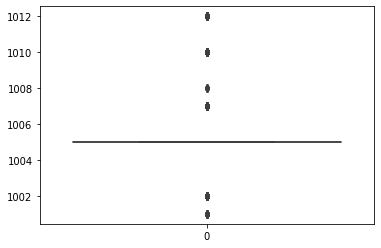

In [9]:
sns.boxplot(df["C1"])

<AxesSubplot:>

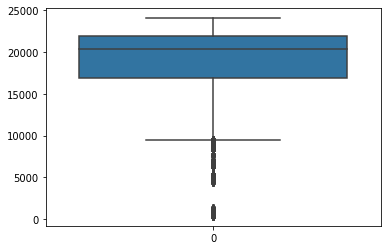

In [10]:
sns.boxplot(df["C14"])

<AxesSubplot:>

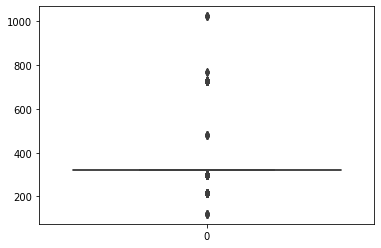

In [11]:
sns.boxplot(df["C15"])

<AxesSubplot:>

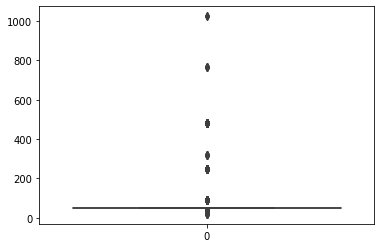

In [12]:
sns.boxplot(df["C16"])

<AxesSubplot:>

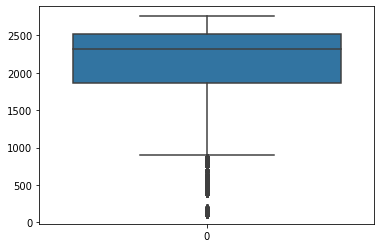

In [13]:
sns.boxplot(df["C17"])

<AxesSubplot:>

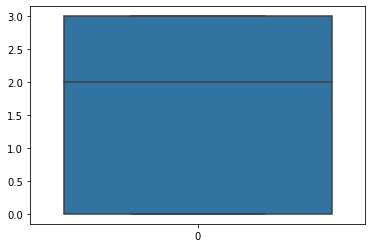

In [14]:
sns.boxplot(df["C18"])

<AxesSubplot:>

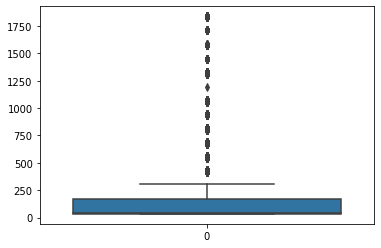

In [15]:
sns.boxplot(df["C19"])

<AxesSubplot:>

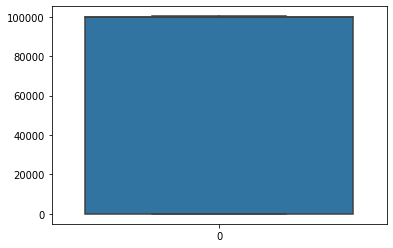

In [16]:
sns.boxplot(df["C20"])

<AxesSubplot:>

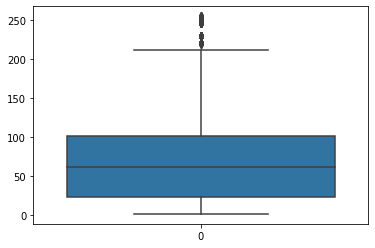

In [17]:
sns.boxplot(df["C21"])

#### Inference: there are too many outliers in the data and the values in these columns are imbalanced. This might affect the model prediction. Let us handle these columns further in the analysis.

## Clicks done after seeing the advertisement

In [18]:
df["click"].value_counts()

False    83019
True     16980
Name: click, dtype: int64

In [19]:
df["y"].value_counts()

0    83019
1    16980
Name: y, dtype: int64

In [20]:
sns.countplot(data=df, x='click');

In [21]:
df['click'].value_counts() / len(df) * 100

False    83.01983
True     16.98017
Name: click, dtype: float64

#### Inference: 83.01% of the data corresponds to a click whereas remaining 16.98 % of the data represents the Ads that were not clicked.

### Time Series plot for number of clicks on given dates

Text(0.5, 1.0, 'Hourly number of clicks during the dates')

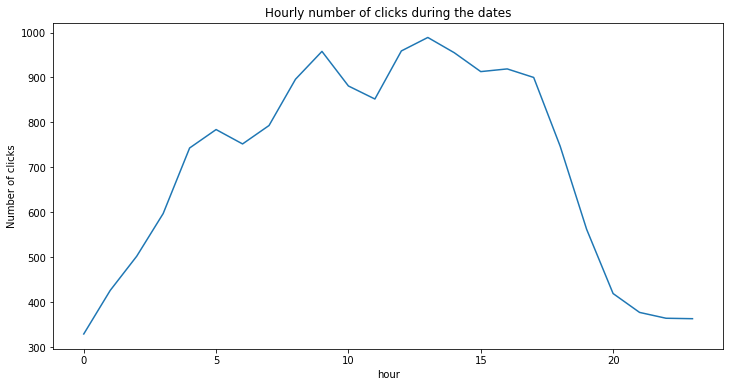

In [22]:
df.groupby('hour').sum()['click'].plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Hourly number of clicks during the dates')

#### Inference: Maximum number of cliks were observed between the 10th and 15th hour.

Text(0.5, 1.0, 'Number of Clicks')

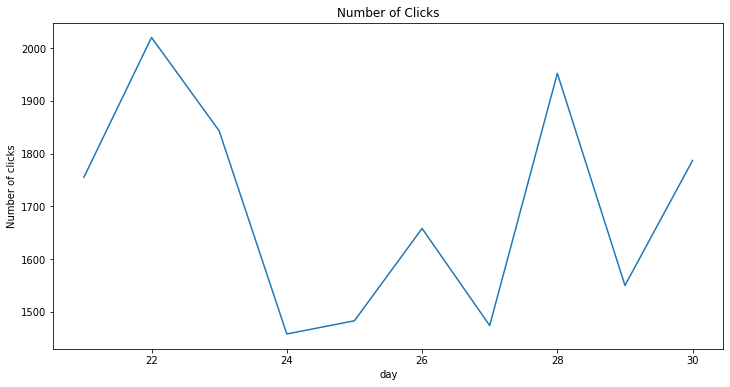

In [23]:
df.groupby('day').sum()['click'].plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of Clicks')

#### Inference: Maximum number of cliks were observed on the 22nd day of the month.

## CTR -Click Through Rate

In [24]:
click_df = df[df['click'] == 1]
hour_df = df.groupby(['hour']).count()['click'].reset_index().rename(columns={'click':'impressions'})
hour_df['clicks'] = click_df.groupby(['hour']).count().reset_index()['click']
hour_df['CTR'] = hour_df['clicks'] / hour_df['impressions'] * 100

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data=hour_df, y='CTR', x='hour')
plt.title('CTR Hourly')

Text(0.5, 1.0, 'CTR Hourly')

In [26]:
hour_df.sort_values(by='CTR', ascending=False).head()

hour  impressions  clicks        CTR
15    15         5019     913  18.190875
16    16         5077     919  18.101241
1      1         2375     426  17.936842
23    23         2045     363  17.750611
14    14         5393     955  17.708140

### From CTR plot we can see that highest CTR is at 15th and 16th hour with 18.19%, 18.10%  respectively.

In [27]:
weekday_dict = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
}

In [28]:
df['dayofweek'] = df['dayofweek'].map(weekday_dict)

In [29]:
df.groupby('dayofweek').sum()['click'].plot();
plt.ylabel('Number of labels');
plt.title('Trend of clicks by day of week');

In [30]:
df.groupby('dayofweek').sum()['click'].sort_values(ascending=False)

dayofweek
Tuesday      3707
Thursday     3630
Wednesday    3570
Sunday       1658
Saturday     1483
Monday       1474
Friday       1458
Name: click, dtype: int64

### Inference:
#### We can see from the plot that the number of clicks starts to rise from sunday till tuesdays and then it goes down on wednesday
#### We could see that tuesdays has most number of clicks 

<AxesSubplot:xlabel='dayofweek'>

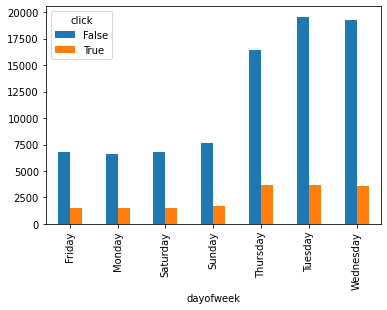

In [31]:
df.groupby(['dayofweek', 'click']).size().unstack().plot(kind='bar')

### CTR for weekdays

In [32]:
click_df = df[df['click'] == 1]

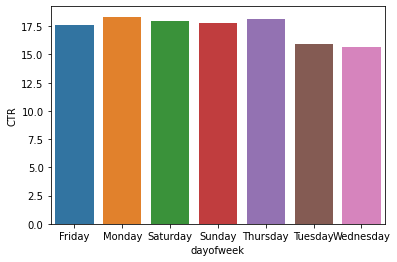

In [33]:
#weekday_df
weekday_df = df[['dayofweek', 'click']].groupby(['dayofweek']).count().reset_index().rename(columns={'click':'impressions'})
weekday_df['clicks'] = click_df[['dayofweek', 'click']].groupby('dayofweek').count().reset_index()['click']
weekday_df['CTR'] = weekday_df['clicks'] / weekday_df['impressions'] * 100
sns.barplot(data=weekday_df, x='dayofweek', y='CTR');

### Let us analyze how other columns affect clicks

## Banner Position:

In [34]:
df['banner_pos'].unique()

array([1, 0, 4, 7, 2, 5, 3], dtype=int64)

In [35]:
df.banner_pos.value_counts() / len(df)

0    0.717787
1    0.280523
7    0.001070
2    0.000300
4    0.000190
5    0.000090
3    0.000040
Name: banner_pos, dtype: float64

#### As we could see that Banner position 0 and 1 has 71.77% and 28.05 % of coverage in the dataset

In [36]:
df[df['banner_pos'] == 0]['click'].sum()

11865

In [37]:
# CTR for banner position
for i in df.banner_pos.unique():
    print('Banner position', i, ':', df[df['banner_pos'] == i]['click'].mean())

Banner position 1 : 0.1808783687437616
Banner position 0 : 0.16530134581626682
Banner position 4 : 0.05263157894736842
Banner position 7 : 0.3177570093457944
Banner position 2 : 0.16666666666666666
Banner position 5 : 0.0
Banner position 3 : 0.25


#### Important banner pos are 0 with 71.7% data coverage and 0.16 CTR & 1 with 28.05% data coverage and 0.18 CTR

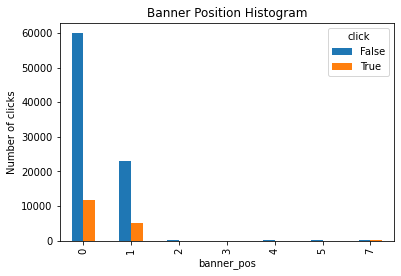

In [38]:
df.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar');
plt.title('Banner Position Histogram');
plt.ylabel('Number of clicks');

# Site ID Attribute:

#### Let us get the unique values in site column

In [39]:
len(df.site_id.unique())

1485

### Top 10 sites in the dataset are:

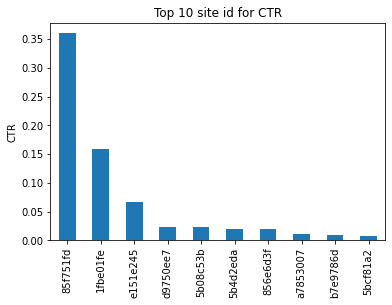

In [40]:
(df.site_id.value_counts().sort_values(ascending=False).head(10) / len(df)).plot(kind='bar');
plt.ylabel('CTR');
plt.title('Top 10 site id for CTR');

In [41]:
top10_id = (df.site_id.value_counts().sort_values(ascending=False).head(10) / len(df)).index

In [42]:
for i in top10_id:
    print('Site id -',i, ':', 'CTR ' ,df[df.site_id == i]['click'].mean())

Site id - 85f751fd : CTR  0.12109266559324856
Site id - 1fbe01fe : CTR  0.20287479510780482
Site id - e151e245 : CTR  0.29649840836743974
Site id - d9750ee7 : CTR  0.2815656565656566
Site id - 5b08c53b : CTR  0.45770065075921906
Site id - 5b4d2eda : CTR  0.1209133367929424
Site id - 856e6d3f : CTR  0.03404255319148936
Site id - a7853007 : CTR  0.10845431255337319
Site id - b7e9786d : CTR  0.0639412997903564
Site id - 5bcf81a2 : CTR  0.10545454545454545


Top three site id which has highest CTR are:
1. 5b08c53b : 45.77%
2. e151e245 : 29.64%
3. d9750ee7 : 28.15%

In [43]:
df.site_id.value_counts().sort_values(ascending=False).head(10) / len(df)

85f751fd    0.360224
1fbe01fe    0.158622
e151e245    0.065971
d9750ee7    0.023760
5b08c53b    0.023050
5b4d2eda    0.019270
856e6d3f    0.018800
a7853007    0.011710
b7e9786d    0.009540
5bcf81a2    0.008250
Name: site_id, dtype: float64

In [44]:
top10_sites_df = df[df.site_id.isin(top10_id)]
top10_sites_df.groupby(['site_id','click']).size().unstack().plot(kind='bar')
plt.title('Number of clicks and non-clicks for top 10 site id');

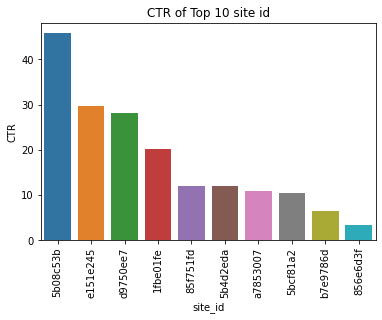

In [45]:
df_sites_ = top10_sites_df[['site_id', 'click']].groupby(['site_id']).count().reset_index().rename(columns={'click': 'impressions'})
df_sites_['click'] = top10_sites_df[['site_id', 'click']].groupby(['site_id']).sum().reset_index()['click']
df_sites_['CTR'] = df_sites_['click'] / df_sites_['impressions'] * 100
sort_site = df_sites_.sort_values(by='CTR', ascending=False).site_id.tolist()
sns.barplot(data=df_sites_, x='site_id', y='CTR',order=sort_site);
plt.xticks(rotation=90)
plt.title('CTR of Top 10 site id');
plt.ylabel('CTR');

#### Above plot shows the top 10 site id with CTR rates. Top 3 site id with CTR are as 45.77%, 29.64% and 28.15%

# Site Domain

In [46]:
df.site_domain.nunique()

1331

#### There are 1331 unique site domains in the dataset

### Top 10 site domains:

In [47]:
print('The top 10 site domains that have most impressions:')
print((df.site_domain.value_counts()/ len(df)).head(10) * 100)

The top 10 site domains that have most impressions:
c4e18dd6    37.362374
f3845767    15.862159
7e091613     8.280083
7687a86e     3.220032
98572c79     2.456025
16a36ef3     2.137021
58a89a43     1.880019
b12b9f85     0.971010
9d54950b     0.909009
17d996e6     0.826008
Name: site_domain, dtype: float64


In [48]:
top10_domain_id = (df['site_domain'].value_counts() / len(df)).head(10).index

for i in top10_domain_id:
    print('Site domain -',i, ':', 'CTR ' ,df[df.site_domain == i]['click'].mean())

Site domain - c4e18dd6 : CTR  0.12555537712113912
Site domain - f3845767 : CTR  0.20287479510780482
Site domain - 7e091613 : CTR  0.25881642512077296
Site domain - 7687a86e : CTR  0.4605590062111801
Site domain - 98572c79 : CTR  0.28094462540716614
Site domain - 16a36ef3 : CTR  0.13242863827795975
Site domain - 58a89a43 : CTR  0.03404255319148936
Site domain - b12b9f85 : CTR  0.06694129763130793
Site domain - 9d54950b : CTR  0.09900990099009901
Site domain - 17d996e6 : CTR  0.32929782082324455


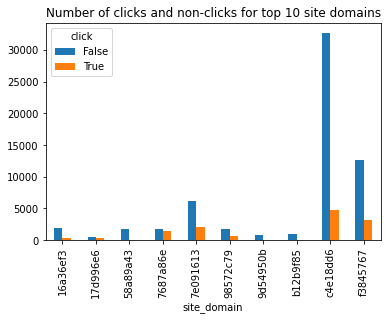

In [49]:
top10_domain_df = df[df.site_domain.isin(top10_domain_id)]
top10_domain_df.groupby(['site_domain','click']).size().unstack().plot(kind='bar')
plt.title('Number of clicks and non-clicks for top 10 site domains');

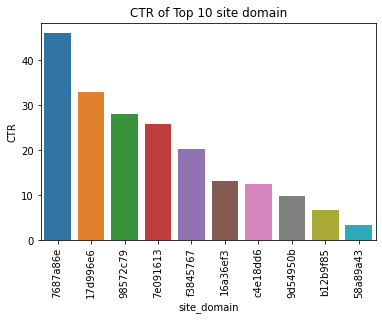

In [50]:
df_domain_ = top10_domain_df[['site_domain', 'click']].groupby(['site_domain']).count().reset_index().rename(columns={'click': 'impressions'})
df_domain_['click'] = top10_domain_df[['site_domain', 'click']].groupby(['site_domain']).sum().reset_index()['click']
df_domain_['CTR'] = df_domain_['click'] / df_domain_['impressions'] * 100
sort_domain = df_domain_.sort_values(by='CTR', ascending=False).site_domain.tolist()
sns.barplot(data=df_domain_, x='site_domain', y='CTR',order=sort_domain);
plt.xticks(rotation=90)
plt.title('CTR of Top 10 site domain');
plt.ylabel('CTR');

# Site Category:

In [51]:
df.site_category.nunique()

19

#### There are 19 unique site categories

In [52]:
print('The top 10 site category that have most impressions:')
print((df.site_category.value_counts()/ len(df)).head(10) * 100)

The top 10 site category that have most impressions:
50e219e0    40.839408
f028772b    31.408314
28905ebd    18.107181
3e814130     7.668077
f66779e6     0.634006
75fa27f6     0.392004
335d28a8     0.358004
76b2941d     0.247002
c0dd3be3     0.104001
72722551     0.064001
Name: site_category, dtype: float64


In [53]:
top10_site_category = (df['site_category'].value_counts() / len(df)).head(10).index

for i in top10_site_category:
    print('Site category -',i, ':', 'CTR ' ,df[df.site_category == i]['click'].mean())

Site category - 50e219e0 : CTR  0.13122260584245451
Site category - f028772b : CTR  0.17670657157412123
Site category - 28905ebd : CTR  0.205942453194897
Site category - 3e814130 : CTR  0.2841679707876891
Site category - f66779e6 : CTR  0.04258675078864353
Site category - 75fa27f6 : CTR  0.09948979591836735
Site category - 335d28a8 : CTR  0.09497206703910614
Site category - 76b2941d : CTR  0.016194331983805668
Site category - c0dd3be3 : CTR  0.09615384615384616
Site category - 72722551 : CTR  0.078125


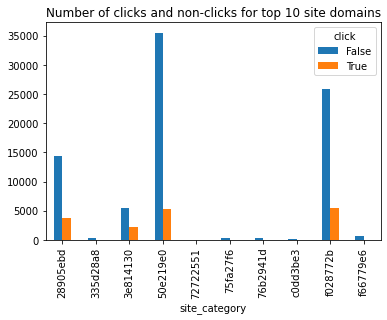

In [54]:
top10_category_df = df[df.site_category.isin(top10_site_category)]
top10_category_df.groupby(['site_category','click']).size().unstack().plot(kind='bar')
plt.title('Number of clicks and non-clicks for top 10 site domains');

In [55]:
df_category_ = top10_category_df[['site_category', 'click']].groupby(['site_category']).count().reset_index().rename(columns={'click': 'impressions'})
df_category_['click'] = top10_category_df[['site_category', 'click']].groupby(['site_category']).sum().reset_index()['click']
df_category_['CTR'] = df_category_['click'] / df_category_['impressions'] * 100
sort_category = df_category_.sort_values(by='CTR', ascending=False).site_category.tolist()
sns.barplot(data=df_category_, x='site_category', y='CTR',order=sort_category);
plt.xticks(rotation=90)
plt.title('CTR of Top 10 site domain');
plt.ylabel('CTR');

# Device Attribute:

## Device ID:

In [56]:
df.device_id.nunique()

16801

#### There are 16801 device id in the data set

In [57]:
print('The top 10 device id that have most impressions:')
print((df.device_id.value_counts()/ len(df)).head(10) * 100)

The top 10 device id that have most impressions:
a99f214a    82.579826
c357dbff     0.062001
0f7c61dc     0.051001
afeffc18     0.034000
936e92fb     0.027000
cef4c8cc     0.012000
28dc8687     0.011000
d857ffbb     0.009000
9af87478     0.009000
02da5312     0.008000
Name: device_id, dtype: float64


In [58]:
top10_device_id = (df['device_id'].value_counts() / len(df)).head(10).index

for i in top10_device_id:
    print('Device id -',i, ':', 'CTR ' ,df[df.device_id == i]['click'].mean())

Device id - a99f214a : CTR  0.172586250741714
Device id - c357dbff : CTR  0.6935483870967742
Device id - 0f7c61dc : CTR  0.7647058823529411
Device id - afeffc18 : CTR  0.23529411764705882
Device id - 936e92fb : CTR  0.037037037037037035
Device id - cef4c8cc : CTR  0.25
Device id - 28dc8687 : CTR  0.0
Device id - d857ffbb : CTR  0.2222222222222222
Device id - 9af87478 : CTR  0.0
Device id - 02da5312 : CTR  0.25


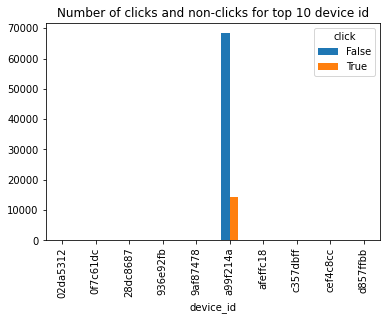

In [59]:
top10_device_id_df = df[df.device_id.isin(top10_device_id)]
top10_device_id_df.groupby(['device_id','click']).size().unstack().plot(kind='bar')
plt.title('Number of clicks and non-clicks for top 10 device id');

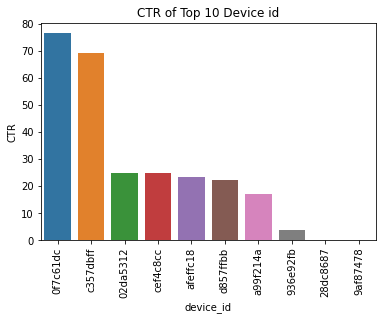

In [60]:
df_device_id_ = top10_device_id_df[['device_id', 'click']].groupby(['device_id']).count().reset_index().rename(columns={'click': 'impressions'})
df_device_id_['click'] = top10_device_id_df[['device_id', 'click']].groupby(['device_id']).sum().reset_index()['click']
df_device_id_['CTR'] = df_device_id_['click'] / df_device_id_['impressions'] * 100
sort_device_id = df_device_id_.sort_values(by='CTR', ascending=False).device_id.tolist()
sns.barplot(data=df_device_id_, x='device_id', y='CTR',order=sort_device_id);
plt.xticks(rotation=90)
plt.title('CTR of Top 10 Device id');
plt.ylabel('CTR');

## Device Type:

In [61]:
print('There are ', df['device_type'].nunique(), 'different kind of device types which are used in according to dataset')

There are  4 different kind of device types which are used in according to dataset


In [62]:
print('Percentage of ads were shown to users','\n\n', df['device_type'].value_counts() / len(df) * 100)

Percentage of ads were shown to users 

 1    92.239922
0     5.494055
4     1.931019
5     0.335003
Name: device_type, dtype: float64


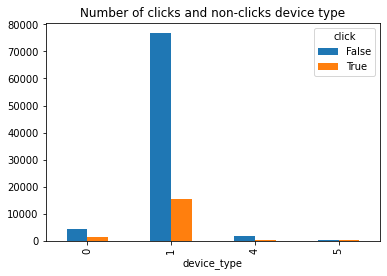

In [63]:
df.groupby(['device_type','click']).size().unstack().plot(kind='bar')
plt.title('Number of clicks and non-clicks device type');

#### Device type 1 has higher impressions as well as clicks also as compared to other device types. After this device type 0 has most impressions and clicks

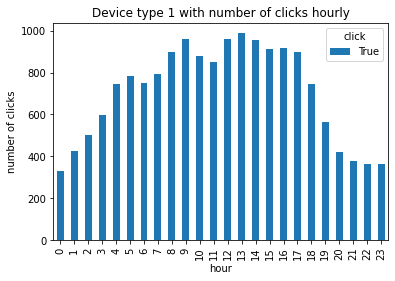

In [64]:
df[df.click == 1].groupby(['hour', 'click']).size().unstack().plot(kind='bar')
plt.title('Device type 1 with number of clicks hourly');
plt.ylabel('number of clicks');

# Removing unwanted Columns: 

In [65]:
train_df = df.copy()

In [66]:
train_df.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour',
       'y'],
      dtype='object')

#### As the anonymous categorical columns had too many outliers, these columns will be dropped. Click variable is not required as we have "y" with 1 and 0 to represent click or not clicked. "month" variable has just one value and device id has more than 80k values so these will also be removed to ensure balanced model prediction.

In [67]:
train_df.drop(columns=['click', 'month', 'device_id', 'C1', 'C14','C15','C16','C17','C18','C19','C20','C21'], axis=1, inplace=True)

In [68]:
train_df.head()

banner_pos   site_id site_domain site_category    app_id app_domain  \
0           1  856e6d3f    58a89a43      f028772b  ecad2386   7801e8d9   
1           1  e151e245    7e091613      f028772b  ecad2386   7801e8d9   
2           0  e3c09f3a    d262cf1e      28905ebd  ecad2386   7801e8d9   
3           0  0da94452    248e439f      50e219e0  ecad2386   7801e8d9   
4           0  1fbe01fe    f3845767      28905ebd  ecad2386   7801e8d9   

  app_category device_ip device_model  device_type  device_conn_type  \
0     07d7df22  962c8333     be6db1d7            1                 0   
1     07d7df22  5b1f94b9     1b13b020            1                 0   
2     07d7df22  a9a84f4c     9a45a8e8            1                 0   
3     07d7df22  88c62dad     ea6abc60            0                 0   
4     07d7df22  1e5e0d0e     36d749e5            1                 0   

   dayofweek  day  hour  y  
0    Tuesday   28    14  0  
1  Wednesday   22    19  1  
2   Thursday   23    18  0  
3  Wednesday   22    19  0  
4    Tuesday   21     8  1

## Converting categorical values to numeric values by hash method

### we could also use OneHotEncoder to do so which would do same thing but would have many number of columns. Hash Encoding represents the categorical data into numerical value by the hashing function.

In [69]:
train_df.dtypes

banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
dayofweek           object
day                  int64
hour                 int64
y                    int64
dtype: object

### Note: 
There are few columns with data type as object(Categorical data)

In [70]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train_df = convert_obj_to_int(train_df)

def obj_to_int(df):
    for idx in df.dtypes[df.dtypes == 'object'].index:
        df[idx + '_hash_int'] = df[idx].apply(lambda x: hash(x))
    return df

In [71]:
train_df.dtypes

banner_pos           int64
device_type          int64
device_conn_type     int64
day                  int64
hour                 int64
y                    int64
site_id_int          int64
site_domain_int      int64
site_category_int    int64
app_id_int           int64
app_domain_int       int64
app_category_int     int64
device_ip_int        int64
device_model_int     int64
dayofweek_int        int64
dtype: object

### Note: 
After hashing, all columns are with data type as int.

In [72]:
train_df.head()

banner_pos  device_type  device_conn_type  day  hour  y  \
0           1            1                 0   28    14  0   
1           1            1                 0   22    19  1   
2           0            1                 0   23    18  0   
3           0            0                 0   22    19  0   
4           0            1                 0   21     8  1   

           site_id_int      site_domain_int    site_category_int  \
0  2619527999813928093 -6823785354676192738  5611867855868455903   
1  1840559871844662431 -6655771474351019115  5611867855868455903   
2  5783807495941523120 -5812929943404039134 -1836106437348684998   
3   -85752641054560734 -6217850590316238978 -6748697855626919340   
4  5150092568097133194  -841052093995963504 -1836106437348684998   

            app_id_int       app_domain_int     app_category_int  \
0  8139378156239028656 -7515248522337672251  3777528870457064742   
1  8139378156239028656 -7515248522337672251  3777528870457064742   
2  8139378156239028656 -7515248522337672251  3777528870457064742   
3  8139378156239028656 -7515248522337672251  3777528870457064742   
4  8139378156239028656 -7515248522337672251  3777528870457064742   

         device_ip_int     device_model_int        dayofweek_int  
0 -1439936829841197480  9098255952517575235  2183046276731593275  
1  -185267026514907713 -1887270802089943555 -4091456623387298925  
2  7440341934457276634  6937162384941968432 -1248048490761826327  
3 -1547027886748879440 -4038434883883941376 -4091456623387298925  
4  6111643007705008672  9197675691152144059  2183046276731593275

### Remove Y column as this is a target variable not an input variable

In [73]:
input_cols = train_df.select_dtypes(include=np.number).columns.to_list()

In [74]:
# removing y from inputs
input_cols.remove('y')

In [75]:
train_inputs = train_df[input_cols]

#### create validation and train set 
#### use logistic regression, XGBBOOST, LGb, SVM, Decissiontree on this dataset to predict whether a user will click the ad or not 

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = train_df.drop(columns = ['y']).copy()
y = train_df['y']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(79999, 14)
(79999,)
(10000, 14)
(10000,)
(10000, 14)
(10000,)


(None, None)

# Scaling the data

#### We will be usTransform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.




In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
X_train.describe().head()

banner_pos   device_type  device_conn_type           day  \
count  79999.000000  79999.000000      79999.000000  79999.000000   
mean       0.290629      1.016038          0.327604     25.477693   
std        0.508520      0.529398          0.852772      2.970395   
min        0.000000      0.000000          0.000000     21.000000   
25%        0.000000      1.000000          0.000000     23.000000   

               hour   site_id_int  site_domain_int  site_category_int  \
count  79999.000000  7.999900e+04     7.999900e+04       7.999900e+04   
mean      11.279703  3.590324e+18    -1.316632e+18      -1.466539e+18   
std        5.937866  3.807500e+18     3.784301e+18       5.252967e+18   
min        0.000000 -9.223311e+18    -9.202238e+18      -8.169551e+18   
25%        7.000000  1.840560e+18    -3.614328e+18      -6.748698e+18   

         app_id_int  app_domain_int  app_category_int  device_ip_int  \
count  7.999900e+04    7.999900e+04      7.999900e+04   7.999900e+04   
mean   5.034702e+18   -6.211649e+18      1.669232e+18  -4.968280e+16   
std    5.063005e+18    3.784782e+18      3.706034e+18   5.304759e+18   
min   -9.220000e+18   -9.062637e+18     -8.843093e+18  -9.222238e+18   
25%    3.048870e+18   -7.515249e+18      3.748347e+17  -4.605811e+18   

       device_model_int  dayofweek_int  
count      7.999900e+04   7.999900e+04  
mean       4.505629e+17   6.656286e+17  
std        5.628740e+18   4.019157e+18  
min       -9.222313e+18  -4.091457e+18  
25%       -4.519782e+18  -1.252844e+18

In [80]:
X_train.dtypes

banner_pos           int64
device_type          int64
device_conn_type     int64
day                  int64
hour                 int64
site_id_int          int64
site_domain_int      int64
site_category_int    int64
app_id_int           int64
app_domain_int       int64
app_category_int     int64
device_ip_int        int64
device_model_int     int64
dayofweek_int        int64
dtype: object

In [81]:
scaler_train = MinMaxScaler()


In [82]:
scaler_train.fit(X_train)


MinMaxScaler()

In [83]:
X_train[input_cols] = scaler_train.transform(X_train[input_cols])
X_valid[input_cols] = scaler_train.transform(X_valid[input_cols])

In [84]:
X_train.describe()


banner_pos   device_type  device_conn_type           day  \
count  79999.000000  79999.000000      79999.000000  79999.000000   
mean       0.041518      0.203208          0.065521      0.497521   
std        0.072646      0.105880          0.170554      0.330044   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.200000          0.000000      0.222222   
50%        0.000000      0.200000          0.000000      0.555556   
75%        0.142857      0.200000          0.000000      0.777778   
max        1.000000      1.000000          1.000000      1.000000   

               hour   site_id_int  site_domain_int  site_category_int  \
count  79999.000000  79999.000000     79999.000000       79999.000000   
mean       0.490422      0.695101         0.429126           0.396247   
std        0.258168      0.206545         0.205937           0.310528   
min        0.000000      0.000000         0.000000           0.000000   
25%        0.304348      0.600182         0.304088           0.083993   
50%        0.478261      0.779714         0.507436           0.374400   
75%        0.695652      0.797679         0.507436           0.814685   
max        1.000000      1.000000         1.000000           1.000000   

         app_id_int  app_domain_int  app_category_int  device_ip_int  \
count  79999.000000    79999.000000      79999.000000   79999.000000   
mean       0.772982        0.157684          0.601223       0.497279   
std        0.274549        0.209330          0.211956       0.287591   
min        0.000000        0.000000          0.000000       0.000000   
25%        0.665297        0.085584          0.527194       0.250274   
50%        0.941338        0.085584          0.721801       0.493010   
75%        0.941338        0.085584          0.721801       0.746810   
max        1.000000        1.000000          1.000000       1.000000   

       device_model_int  dayofweek_int  
count      79999.000000   79999.000000  
mean           0.524483       0.386155  
std            0.305202       0.326254  
min            0.000000       0.000000  
25%            0.254981       0.230424  
50%            0.554229       0.230813  
75%            0.815748       0.509331  
max            1.000000       1.000000

In [85]:
X_valid.describe()

banner_pos   device_type  device_conn_type           day  \
count  10000.000000  10000.000000      10000.000000  10000.000000   
mean       0.041000      0.204800          0.067280      0.498844   
std        0.070719      0.111257          0.172361      0.329237   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.200000          0.000000      0.222222   
50%        0.000000      0.200000          0.000000      0.555556   
75%        0.142857      0.200000          0.000000      0.777778   
max        1.000000      1.000000          1.000000      1.000000   

               hour   site_id_int  site_domain_int  site_category_int  \
count  10000.000000  10000.000000     10000.000000       10000.000000   
mean       0.493565      0.696599         0.430037           0.389643   
std        0.260132      0.204221         0.203570           0.310114   
min        0.000000      0.007292         0.000381           0.000000   
25%        0.304348      0.600182         0.321997           0.083993   
50%        0.521739      0.779714         0.507436           0.374400   
75%        0.695652      0.797679         0.507436           0.814685   
max        1.000000      0.998414         0.998043           1.000000   

         app_id_int  app_domain_int  app_category_int  device_ip_int  \
count  10000.000000    10000.000000      10000.000000   10000.000000   
mean       0.771012        0.159385          0.595267       0.499175   
std        0.274006        0.212846          0.218124       0.288587   
min        0.004032        0.000000          0.000000       0.000110   
25%        0.665297        0.085584          0.527194       0.250061   
50%        0.941338        0.085584          0.721801       0.499076   
75%        0.941338        0.085584          0.721801       0.750566   
max        0.998153        0.995781          1.000000       0.999848   

       device_model_int  dayofweek_int  
count      10000.000000   10000.000000  
mean           0.520406       0.387770  
std            0.304820       0.326927  
min            0.000000       0.000000  
25%            0.254981       0.230424  
50%            0.549141       0.230813  
75%            0.815748       0.509331  
max            1.000000       1.000000

In [86]:
scaler_test = MinMaxScaler()


In [87]:
scaler_test.fit(X_test)


MinMaxScaler()

In [88]:
X_test[input_cols] = scaler_train.transform(X_test[input_cols])

In [89]:
X_test.describe()

banner_pos   device_type  device_conn_type           day  \
count  10000.000000  10000.000000      10000.000000  10000.000000   
mean       0.041057      0.202320          0.067460      0.505156   
std        0.070512      0.103748          0.172534      0.328718   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.200000          0.000000      0.222222   
50%        0.000000      0.200000          0.000000      0.555556   
75%        0.142857      0.200000          0.000000      0.777778   
max        1.000000      1.000000          1.000000      1.000000   

               hour   site_id_int  site_domain_int  site_category_int  \
count  10000.000000  10000.000000     10000.000000       10000.000000   
mean       0.496396      0.694734         0.429912           0.392722   
std        0.256519      0.207024         0.205931           0.309088   
min        0.000000      0.005059         0.000381           0.000000   
25%        0.304348      0.600182         0.304088           0.083993   
50%        0.521739      0.779714         0.507436           0.374400   
75%        0.695652      0.797679         0.507436           0.814685   
max        1.000000      0.998414         0.998043           1.000000   

         app_id_int  app_domain_int  app_category_int  device_ip_int  \
count  10000.000000    10000.000000      10000.000000   10000.000000   
mean       0.772616        0.157292          0.600677       0.489885   
std        0.274235        0.210757          0.213207       0.288933   
min        0.002114        0.000000          0.000000       0.000284   
25%        0.665297        0.085584          0.527194       0.242045   
50%        0.941338        0.085584          0.721801       0.479171   
75%        0.941338        0.085584          0.721801       0.742486   
max        0.993892        0.995781          0.921188       0.999889   

       device_model_int  dayofweek_int  
count      10000.000000   10000.000000  
mean           0.526040       0.387485  
std            0.306541       0.324843  
min            0.000000       0.000000  
25%            0.259052       0.230424  
50%            0.554229       0.230813  
75%            0.815748       0.509331  
max            1.000000       1.000000

## Using Different Classifiers for the problem

### Logistic Regression

Logistic regression is a frequently used Machine Learning algorithm that falls under the category of Supervised Learning techniques. It is utilized for forecasting the categorical dependent variable through a provided set of independent variables.

Logistic regression anticipates the result of a categorical dependent variable. Consequently, the output must be a categorical or discrete value, which can be either Yes or No, 0 or 1, true or False, etc. Instead of yielding an exact value of 0 or 1, it produces probability values that exist within the range of 0 and 1.

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss, r2_score, classification_report

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model_lr = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42, verbose=True)

In [93]:
%%time
model_lr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 829 ms


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=10000, random_state=42, verbose=True)

In [94]:
model_lr.coef_

array([[ 0.49895949, -0.80615132, -1.10857673, -0.05546475,  0.04588524,
         0.47217682, -0.22701351, -0.12839822,  0.45073118, -0.56627307,
         0.23563374, -0.03058062, -0.19235047,  0.09157546]])

In [95]:
model_lr.intercept_

array([-1.90606878])

In [96]:
preds_lr = model_lr.predict(X_train)

In [97]:
acc_train_lr = accuracy_score(y_train, preds_lr)

In [98]:
print('Accuracy score for training set for Logistic Regression is', acc_train_lr)

Accuracy score for training set for Logistic Regression is 0.8300728759109489


In [99]:
val_preds_lr = model_lr.predict(X_valid)

In [100]:
acc_val_lr = accuracy_score(y_valid, val_preds_lr)

In [101]:
print('Accuracy score for validation set for Logistic Regression is', acc_val_lr)

Accuracy score for validation set for Logistic Regression is 0.8296


## DecisionTreeClassifier

#### A Decision tree consists of two primary nodes, namely the Decision Node and the Leaf Node. Decision Nodes are employed to make choices and have numerous branches, whereas Leaf Nodes are the results of those decisions and do not have additional branches.

- The assessments or tests are conducted based on the characteristics of the dataset. It represents a visual depiction of all feasible solutions to a problem/decision based on the specified conditions.

In [102]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [103]:
%%time
model.fit(X_train, y_train)

Wall time: 950 ms


DecisionTreeClassifier(random_state=42)

In [104]:
preds_dtc = model.predict(X_train)

In [105]:
acc_train_dtc = accuracy_score(y_train, preds_dtc)

In [106]:
print('Accuracy score for Training set for Decision Tree classifier is', acc_train_dtc)

Accuracy score for Training set for Decision Tree classifier is 0.9987874848435605


In [107]:
acc_val_dtc = model.score(X_valid, y_valid)

In [108]:
print('Accuracy score for validation set for Decision Tree classifier is', acc_val_dtc)

Accuracy score for validation set for Decision Tree classifier is 0.7366


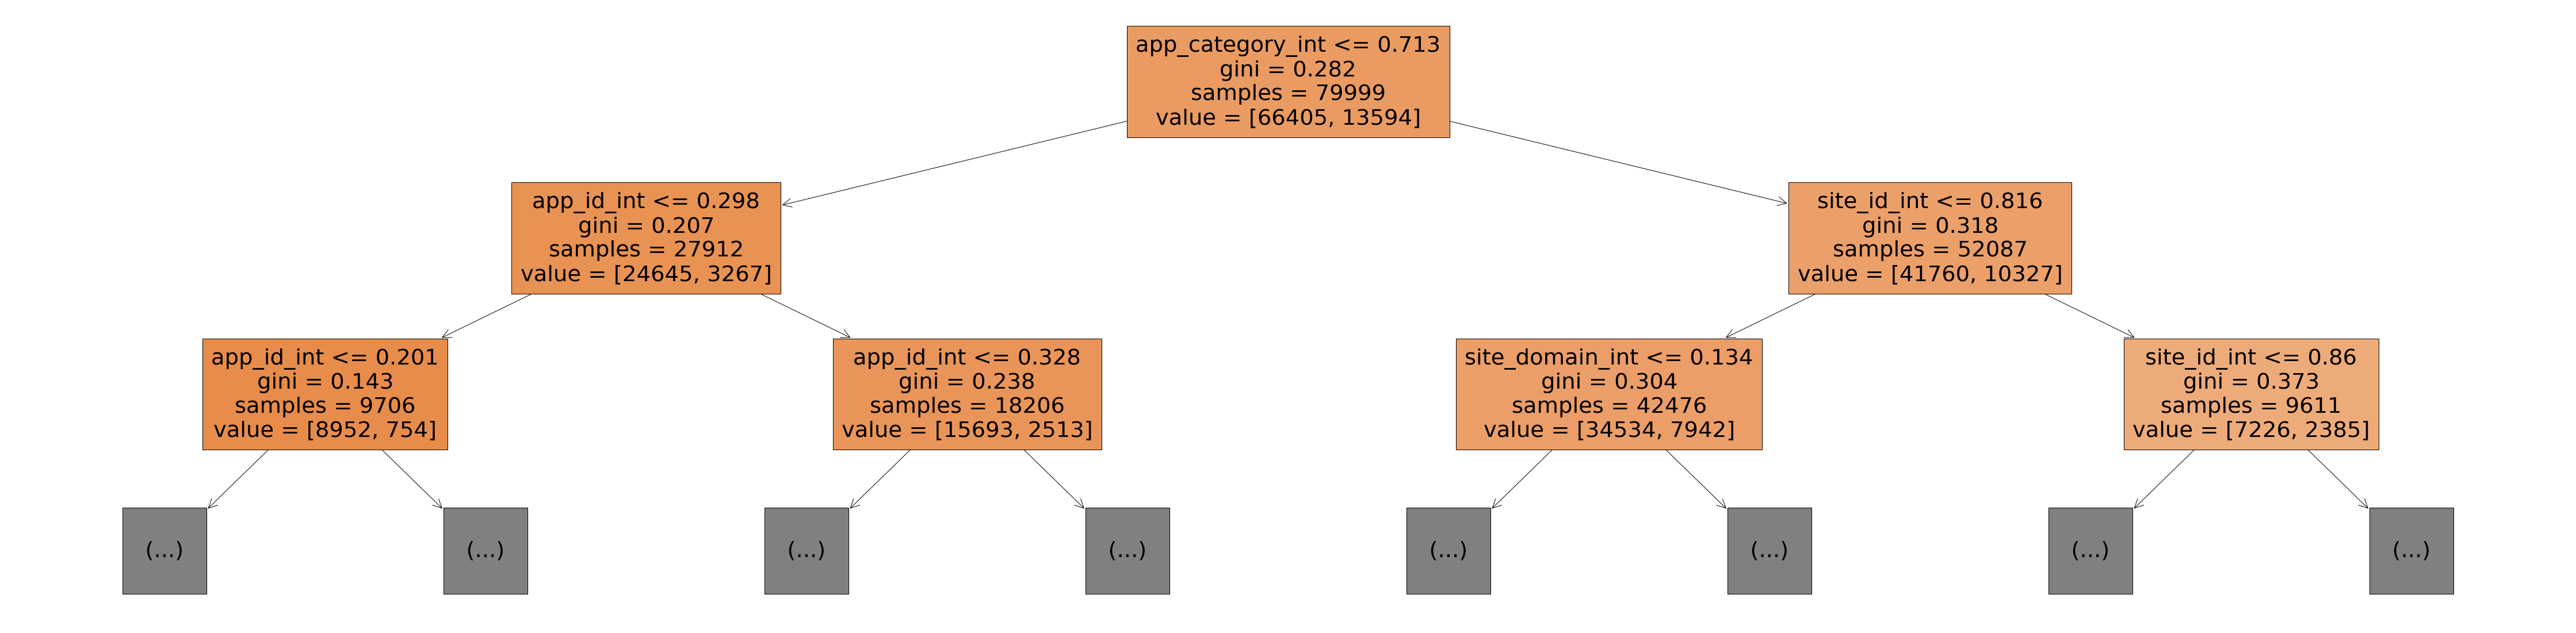

In [109]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [110]:
model.tree_.max_depth

54

In [111]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:2000])

|--- app_category_int <= 0.71
|   |--- app_id_int <= 0.30
|   |   |--- app_id_int <= 0.20
|   |   |   |--- app_id_int <= 0.16
|   |   |   |   |--- app_category_int <= 0.11
|   |   |   |   |   |--- app_id_int <= 0.03
|   |   |   |   |   |   |--- app_id_int <= 0.03
|   |   |   |   |   |   |   |--- hour <= 0.74
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- hour >  0.74
|   |   |   |   |   |   |   |   |--- hour <= 0.83
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- hour >  0.83
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- app_id_int >  0.03
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- app_id_int >  0.03
|   |   |   |   |   |   |--- app_id_int <= 0.14
|   |   |   |   |   |   |   |--- device_model_int <= 0.99
|   |   |   |   |   |   |   |   |--- app_id_int <= 0.08
|   |   |   |   |   |   |   |   |   |--- day <= 0.94
|   |   |   |   |   |   |   |   |   |   |--- hour

In [112]:
model.feature_importances_

array([0.00601206, 0.00280956, 0.00897399, 0.06756507, 0.15256455,
       0.04485272, 0.0441455 , 0.00624069, 0.02905007, 0.00717739,
       0.01401357, 0.35548201, 0.20454538, 0.05656743])

In [113]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [114]:
importance_df.head(10)

feature  importance
11     device_ip_int    0.355482
12  device_model_int    0.204545
4               hour    0.152565
3                day    0.067565
13     dayofweek_int    0.056567
5        site_id_int    0.044853
6    site_domain_int    0.044146
8         app_id_int    0.029050
10  app_category_int    0.014014
2   device_conn_type    0.008974

#### Below are the top 10 most important features which play important role in predicting the CTR.
Device_ip_int being the most important feature with 0.3474 value and device_model_int being second most important feature with 0.2122 value

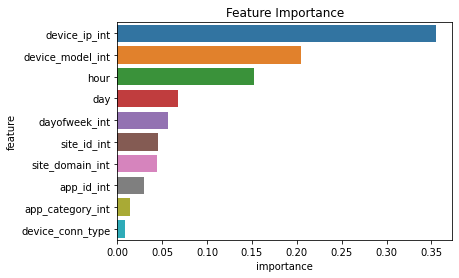

In [115]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### RandomForestClassifier

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
model_rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

In [118]:
%%time
model_rfc.fit(X_train, y_train)

Wall time: 5.23 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [119]:
acc_train_rfc = model_rfc.score(X_train, y_train)

In [120]:
print('Accuracy score for training set for Random Forest classifier is', acc_train_rfc)

Accuracy score for training set for Random Forest classifier is 0.9987374842185527


In [121]:
acc_val_rfc = model_rfc.score(X_valid, y_valid)

In [122]:
print('Accuracy score for validation set for Random Forest classifier is', acc_val_rfc)

Accuracy score for validation set for Random Forest classifier is 0.8178


In [123]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [124]:
importance_df.head(10)

feature  importance
11     device_ip_int    0.355482
12  device_model_int    0.204545
4               hour    0.152565
3                day    0.067565
13     dayofweek_int    0.056567
5        site_id_int    0.044853
6    site_domain_int    0.044146
8         app_id_int    0.029050
10  app_category_int    0.014014
2   device_conn_type    0.008974

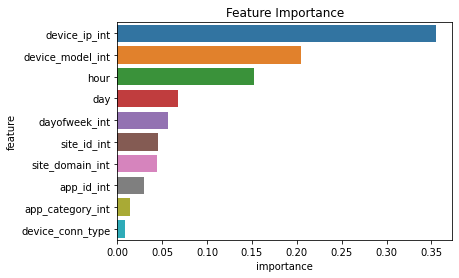

In [125]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

   #### Inference: As Random Forest Classifier has a good accuracy on both train and validation dataset, we can select this to predict the number of clicks as per this Marketing Ad Campaign. 

### Analysis:
 Random Forest is a commonly used machine learning algorithm that is categorized as a supervised learning technique. It has the capability to address Classification and Regression issues in the domain of ML. Its foundation is based on the concept of ensemble learning, which is a technique for combining several classifiers to resolve a complicated problem and enhance the model's efficiency.

The Random Forest classifier, as its name implies, consists of multiple decision trees created on different subsets of the dataset provided, and then it calculates the average to enhance the predictive accuracy of that dataset. Rather than depending on a single decision tree, Random Forest utilizes the predictions from each tree and makes its final output prediction based on the majority of the votes from the predictions.

Having a greater number of trees in the forest results in higher accuracy and eliminates the risk of overfitting.

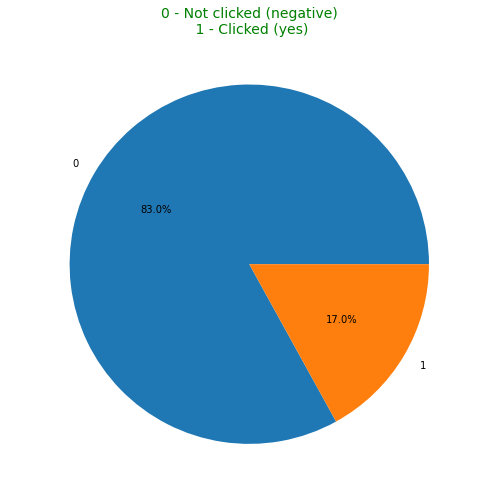

In [126]:
 plt.figure(figsize=(7,7))
 y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
 plt.title(f'0 - Not clicked (negative)\n 1 - Clicked (yes)', size=14, c='green')
 plt.tight_layout(); plt.show() 

## Cross Vaidation and Hyper parameter tuning: (Using feature Selection)
## Evaluation metrics on the Selected Model:

Now let us perform Cross Validation on the Random Forrest model.
The purpose of cross–validation is to test the ability of a machine learning model to predict new data. It is also used to flag problems like overfitting or selection bias and gives insights on how the model will generalize to an independent dataset.
It ensures that the score of our model does not depend on the way we select our train and test subsets. In this approach, we divide the data set into n number of subsets and the holdout method is repeated n number of times.


In [127]:

# cross-validation

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 6)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1,2,3,4]
max_depth
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestClassifier
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 2, verbose=2, random_state=42, n_iter=8, n_jobs=1)
# Fit the random search model
rf_random.fit(X_train, y_train)
print('best params for RF: {}'.format(rf_random.best_params_))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   3.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   3.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total tim

## Evaluation on Train data

In [132]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, log_loss


In [133]:
from sklearn.metrics import plot_confusion_matrix

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=4, bootstrap=True)
rf_clf.fit(X_train, y_train)



RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=50)

AUC: 0.653667910599419
cross-entropy loss: 0.4390057869054201
F1-score; 0.0


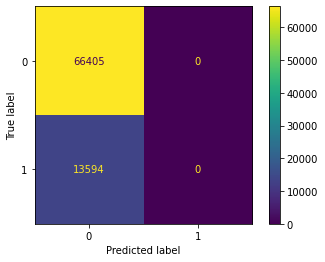

In [140]:
pred_y_train_rf = rf_clf.predict(X_train)
fpr_train_rf, tpr_train_rf, thresholds = roc_curve(y_train, rf_clf.predict_proba(X_train)[:,1])
print('AUC: {}'.format(auc(fpr_train_rf, tpr_train_rf)))
print('cross-entropy loss: {}'.format(log_loss(y_train, rf_clf.predict_proba(X_train)[:,1])))
print('F1-score; {}'.format(f1_score(y_train, pred_y_train_rf)))
plot_confusion_matrix(rf_clf, X_train, y_train)


## Evaluation on test data

AUC: 0.6539820665982602
cross-entropy loss: 0.4359673378888917
F1-score; 0.0


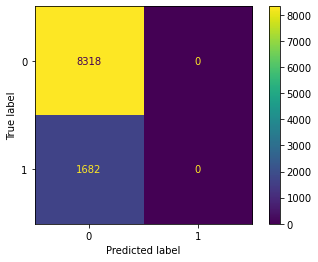

In [135]:
pred_y_test_rf = rf_clf.predict(X_test)
fpr_test_rf, tpr_test_rf, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
print('AUC: {}'.format(auc(fpr_test_rf, tpr_test_rf)))
print('cross-entropy loss: {}'.format(log_loss(y_test, rf_clf.predict_proba(X_test)[:,1])))
print('F1-score; {}'.format(f1_score(y_test, pred_y_test_rf)))
plot_confusion_matrix(rf_clf, X_test, y_test)



## Let us Analyze the evalution metrics of a decision tree classifier

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# assuming X_train, y_train, X_test, y_test are the training and testing datasets
dtc = DecisionTreeClassifier()  # create a decision tree classifier object
dtc.fit(X_train, y_train)  # train the decision tree classifier on the training data
y_pred = dtc.predict(X_test)  # predict the labels for the test data

# calculate the f1 score
f1score = f1_score(y_test, y_pred)

print("F1 Score: ", f1score)

F1 Score:  0.2562534741523068


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X = train_df.drop(columns = ['y']).copy()
y = train_df['y']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a decision tree classifier object
dtc = DecisionTreeClassifier()

# train the decision tree classifier on the training data
dtc.fit(X_train, y_train)

# predict the labels for the test data
y_pred = dtc.predict(X_test)

# calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1score = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)
print("Confusion Matrix: \n", conf_matrix)

# print the true and predicted labels
print("True Labels: ", y_test)
print("Predicted Labels: ", y_pred)

Accuracy:  0.7374
Precision:  0.7454543443031094
Recall:  0.7374
F1 Score:  0.741316681721138
Confusion Matrix: 
 [[20747  4141]
 [ 3737  1375]]
True Labels:  26002    0
80420    0
19864    0
81525    1
57878    0
        ..
81501    0
40375    0
94998    0
76512    0
71374    1
Name: y, Length: 30000, dtype: int64
Predicted Labels:  [0 0 0 ... 1 0 0]


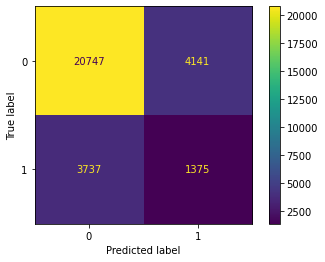

In [146]:
plot_confusion_matrix(dtc, X_test, y_test)

#### 1. Which 3 methods of classification are chosen and why?
Logistic Regression, Random Forest Classifier and Decision Tree classifier.

Logistic Regression, Random Forest Classifier, and Decision Tree Classifier are popular models for classification tasks due to their simplicity, effectiveness, and interpretability.


Logistic Regression:
Logistic Regression is a statistical model that predicts the probability of a binary outcome. It works well for problems where the outcome is binary, and the input features are continuous or categorical. It is a simple and interpretable model that can handle a large number of features.


Random Forest Classifier:
Random Forest Classifier is an ensemble learning method that combines multiple decision trees to make a prediction. It is effective for both classification and regression tasks and works well for large datasets with many features. It is less prone to overfitting and provides good accuracy.


Decision Tree Classifier:
Decision Tree Classifier is a simple and interpretable model that splits the dataset into smaller subsets based on the features to predict the target variable. It is effective for small to medium-sized datasets and works well with both categorical and continuous features.


#### 2. Which method among the 3 chosen is working better than the other 2?
Decision Tree Classifier was chosen on the basis of evaluation metrics. F1 Score for other 2 models were almost 0. When the F1 score of a model is 0, it indicates that the model's predictions are incorrect for all of the positive class samples. The F1 score is a measure of a model's accuracy in identifying both the positive and negative class samples, so a score of 0 for the positive class means that the model is not correctly identifying any positive samples. Hence Decision Tree classifier was chosen as it had F1 score of 0.7


#### 3. How is feature engineering changing the results of the evaluation metrics?

Feature engineering helped in improving the predicted results of the model and accuracy level. 

# Conclusion:

- The data given consisted several numeric and categorical attributes. Data cleaning was performed and after stage 1 EDA, data was analyzed to remove unnecessary columns


- Categorical data was converted to numeric using hash function.


- Dataset was divided into training, validation and testing data.


- After model building, 3 classification/ prediction models were implemented namely- Logistic Regression, Decision Tree Classifier and Random Forest Classifier. 


- Random Forest classifier and Decision tree classifier were selected for further steps to improve the model efficiency. 


- Upon cross validation and calculating evaluation metrics for both, Decision Tree classifier was observed to be a better model. The model performances do not seem to be that good as the data was extremely biased and unbalanced. 


- In the decision tree classifier model, we have used the F1 score as the evaluation metric of choice.


- The F1 score is a measure of the balance between precision and recall, and provides a single number that summarizes the overall performance of the model. In this case, the F1 score of 0.74 indicates that the model is making both false positive and false negative errors, although it is striking a reasonable balance between the two. This means that the model is correctly identifying some instances of the target class (precision) while also minimizing the number of missed instances (recall).


- However, the F1 score alone may not provide a complete picture of the model's performance, and it is important to consider other evaluation metrics as well. 

---------------------------------------------------------------------------------------------------------------------------
***************************************************************************************************************************
End of Notebook

#### The zip folder uploaded consists of the dataset, Jupyter Notebook and ppt presentation converted to a pdf
---------------------------------------------------------------------------------------------------------------------------
***************************************************************************************************************************